# Airbnb Listings Analysis
Analyze AirBnB listings in Paris to determine the impact of 2015 regulations



In [130]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Airbnb data for 250,000+ listings across 10 major cities, along with ~5 million guest reviews.


In [131]:
# Load Data
listings = pd.read_csv('./Airbnb Data/Listings.csv', encoding='latin1')


C:\Users\sarik\AppData\Local\Temp\ipykernel_22656\2420741623.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('./Airbnb Data/Listings.csv', encoding='latin1')


### Objective 1: Profile & QA the data
Calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings.

In [132]:
# Display first few rows of the listings dataset
print("Listings Dataset Head:")
print(listings.head())

Listings Dataset Head:
   listing_id                                              name   host_id  \
0      281420    Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                   39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2     4082273               Lovely apartment with Terrace, 60m2  19252768   
3     4797344               Cosy studio (close to Eiffel tower)  10668311   
4     4823489  Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

   host_since                 host_location host_response_time  \
0  2011-12-03  Paris, Ile-de-France, France                NaN   
1  2013-11-29  Paris, Ile-de-France, France                NaN   
2  2014-07-31  Paris, Ile-de-France, France                NaN   
3  2013-12-17  Paris, Ile-de-France, France                NaN   
4  2014-12-14  Paris, Ile-de-France, France                NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                 NaN                   NaN         

In [133]:
# Listings Dataset Info
print("Listings Dataset Info:")
print(listings.info())

Listings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712

In [134]:
# Listings Dataset Description
print("Listings Dataset Description:")
print(listings.describe(include='all'))

Listings Dataset Description:
          listing_id                 name       host_id  host_since  \
count   2.797120e+05               279537  2.797120e+05      279547   
unique           NaN               265860           NaN        4240   
top              NaN  home away from home           NaN  2019-09-02   
freq             NaN                   98           NaN         710   
mean    2.638196e+07                  NaN  1.081658e+08         NaN   
std     1.442576e+07                  NaN  1.108570e+08         NaN   
min     2.577000e+03                  NaN  1.822000e+03         NaN   
25%     1.384462e+07                  NaN  1.720656e+07         NaN   
50%     2.767098e+07                  NaN  5.826911e+07         NaN   
75%     3.978485e+07                  NaN  1.832853e+08         NaN   
max     4.834353e+07                  NaN  3.901874e+08         NaN   

                       host_location host_response_time  host_response_rate  \
count                         278872  

In [135]:
# Convert 'host_since' to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [136]:
# Count of listings by city
print(listings['city'].value_counts())

# Filter listings for Paris
paris_listings = listings[listings['city'] == 'Paris']
paris_listings.info()

# Select relevant columns for analysis
paris_listings = paris_listings[['listing_id','name','host_id','host_since','neighbourhood','city','accommodates','price']]
paris_listings.head()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919

,listing_id,name,host_id,host_since,neighbourhood,city,accommodates,price
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,Buttes-Montmartre,Paris,2,53
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,Buttes-Montmartre,Paris,2,120
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,Elysee,Paris,2,89
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,Vaugirard,Paris,2,58
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,Passy,Paris,2,60


**Missing values**

- **host_since:** Fewer than 0.05% of rows are null. Given the negligible share and the scope of this basic analysis, I’m leaving these nulls as-is.

- **name:** Some rows have a null listing name, but this field is not used in the analysis. No changes applied.

In [137]:
# Summary statistics for 'accommodates' and 'price'
print(paris_listings[['accommodates','price']].describe())
print(paris_listings.info())

       accommodates         price
count  64690.000000  64690.000000
mean       3.037997    113.096445
std        1.588766    214.433668
min        0.000000      0.000000
25%        2.000000     59.000000
50%        2.000000     80.000000
75%        4.000000    120.000000
max       16.000000  12000.000000
<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     64690 non-null  int64         
 1   name           64627 non-null  object        
 2   host_id        64690 non-null  int64         
 3   host_since     64657 non-null  datetime64[ns]
 4   neighbourhood  64690 non-null  object        
 5   city           64690 non-null  object        
 6   accommodates   64690 non-null  int64         
 7   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.4+ MB
None


In [138]:
# Missing Values in Paris Listings
paris_listings.isna().sum()

# Listings Dataset Duplicates
#print("Listings Dataset Duplicates:")
#print(listings.duplicated().sum())

listing_id        0
name             63
host_id           0
host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

### Objective 2: Prepare the data for visualization
Produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

In [139]:
# Grouping Paris listings by 'neighbourhood' and calculating the mean price
paris_listings_neighbourhood  = paris_listings.groupby('neighbourhood').agg({"price" : "mean"}).sort_values(by='price', ascending=False)  
print(paris_listings_neighbourhood)

                          price
neighbourhood                  
Elysee               210.536765
Louvre               175.379972
Passy                161.144635
Palais-Bourbon       156.856578
Luxembourg           155.638639
Bourse               149.496801
Hotel-de-Ville       144.472110
Temple               138.446823
Pantheon             122.662150
Opera                119.038644
Vaugirard            106.831330
Enclos-St-Laurent    102.967156
Batignolles-Monceau  102.612702
Observatoire         101.866801
Gobelins              98.110184
Popincourt            90.559459
Reuilly               89.058402
Buttes-Montmartre     87.209479
Buttes-Chaumont       82.690182
Menilmontant          74.942257


In [140]:
# Analyzing listings in the 'Elysee' neighbourhood by 'accommodates' and calculating mean price
paris_listings_accomodations = paris_listings[paris_listings['neighbourhood'] == 'Elysee'].groupby('accommodates').agg({"price":"mean"}).sort_values(by='price', ascending=False).reset_index()
paris_listings_accomodations

,accommodates,price
0,14,971.000000
1,13,842.500000
2,11,805.000000
3,16,800.000000
4,12,529.625000
5,10,500.857143
6,9,440.272727
7,7,411.538462
8,8,405.518519
9,6,355.508571


In [141]:
# Analyzing listings over time by 'host_since' year and calculating count of listings and mean price
paris_listings['host_year'] = paris_listings['host_since'].dt.year
paris_listings_over_time  = paris_listings.groupby('host_year').agg({"listing_id":"count", "price":"mean"}).sort_values(by='host_year')
paris_listings_over_time


,listing_id,price
host_year,,
2008.0,4,77.750000
2009.0,106,159.641509
2010.0,416,125.031250
2011.0,1339,124.828230
2012.0,4592,111.578615
2013.0,8142,107.096414
2014.0,10922,100.253800
2015.0,12147,103.646250
2016.0,8871,114.159847


### Objective 3: Visualize the data and summarize findings
Build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

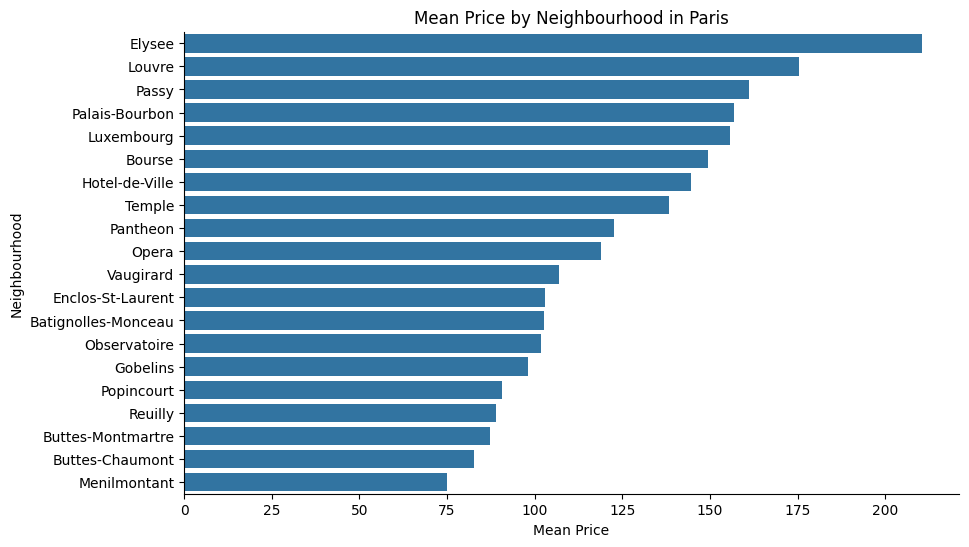

In [142]:
# Mean Price by Neighbourhood in Paris
plt.figure(figsize=(10,6))
sns.barplot(data=paris_listings_neighbourhood, x='price', y=paris_listings_neighbourhood.index,  orient='h')
plt.xlabel('Mean Price')
plt.ylabel('Neighbourhood')
plt.title('Mean Price by Neighbourhood in Paris')

sns.despine()

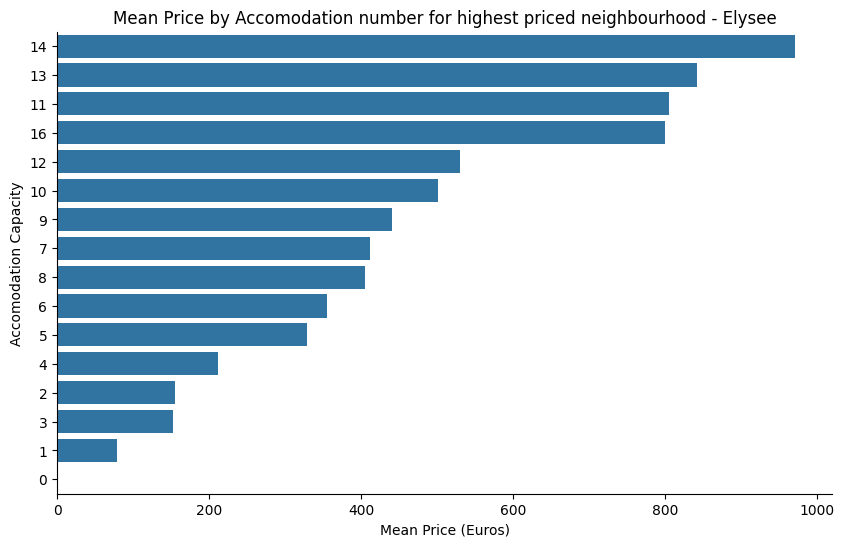

In [143]:
# Mean Price by Accomodation number for highest priced neighbourhood - Elysee
plt.figure(figsize=(10,6))
sns.barplot(data=paris_listings_accomodations, x='price', y=paris_listings_accomodations['accommodates'].astype(str),  orient='h')
plt.xlabel('Mean Price (Euros)')
plt.ylabel('Accomodation Capacity')
plt.title('Mean Price by Accomodation number for highest priced neighbourhood - Elysee')

sns.despine()

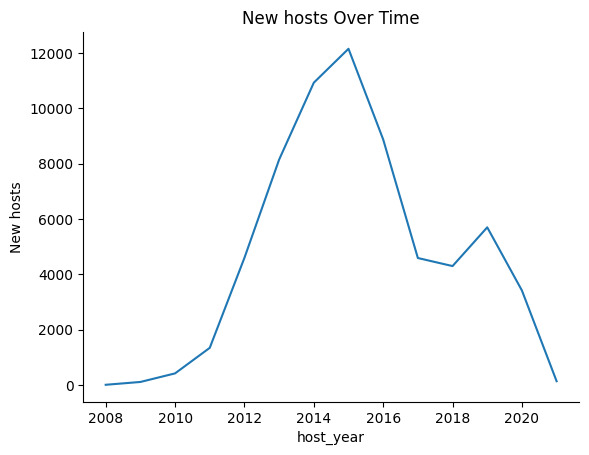

In [144]:
# New hosts over time
paris_listings_over_time['listing_id'].plot(ylabel='New hosts', title='New hosts Over Time')
sns.despine()

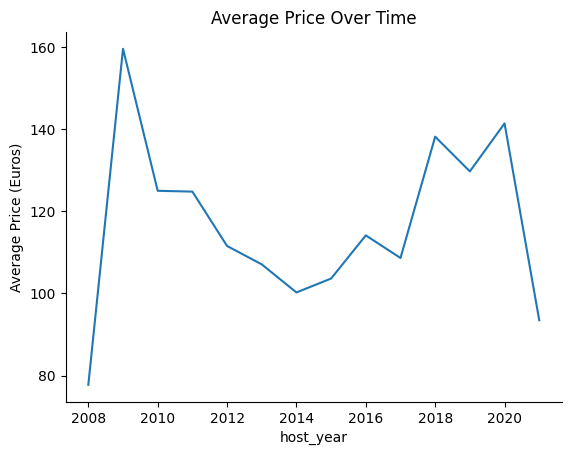

In [145]:
# Average Price Over Time
paris_listings_over_time['price'].plot(ylabel='Average Price (Euros)', title='Average Price Over Time')
sns.despine()

Text(0.5, 1.0, '2015 Regulations lead to fewer New Hosts, Higher Prices')

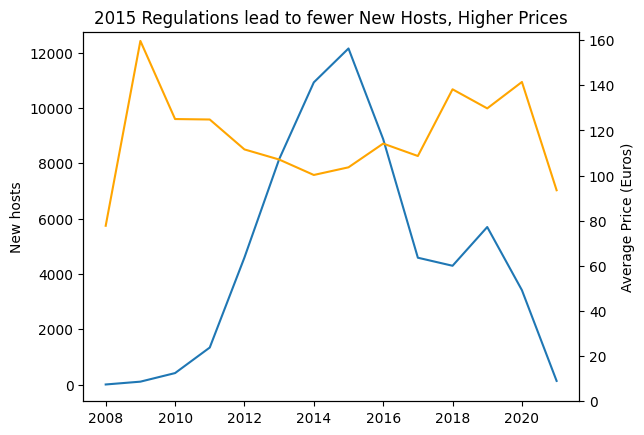

In [146]:
# Combined Plot: New Hosts and Average Price Over Time
fig, ax = plt.subplots()
ax.plot(paris_listings_over_time.index, paris_listings_over_time['listing_id'])
ax.set_ylabel('New hosts')

ax2 = ax.twinx()
ax2.plot(paris_listings_over_time.index, paris_listings_over_time['price'], color='orange')
ax2.set_ylabel('Average Price (Euros)')
ax2.set_ylim(0)
#paris_listings_over_time['price'].plot(ylabel='Average Price (Euros)', title='Average Price Over Time')
#sns.despine()

ax.set_title('2015 Regulations lead to fewer New Hosts, Higher Prices')

### Key Findings:
**Regulations Impacted Growth:** Following the introduction of the 2015 regulations, there was a noticeable decline in the number of new hosts entering the market. This suggests a direct correlation between the new rules and a slower rate of market expansion.

**Average Price Stabilization:** The analysis shows that the average price per rental was effectively regulated after the new policies were enacted. This indicates that the regulations successfully achieved their goal of preventing price volatility or continuous increases.